In [2]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import sqlite3 as sql
import os
import pandas as pd
from datetime import datetime
from glob import glob
import sklearn as sk
import sklearn.linear_model

os.sys.path.append('../')
import PlaceCellAnalysis as pc
import utilities as u
import preprocessing as pp
import behavior as b
import BayesianDecoding as bd


%load_ext autoreload
%autoreload 2

%matplotlib inline

In [3]:
mice = ['4139190.1','4139190.3','4139212.2','4139219.2','4139219.3','4139224.2','4139224.3','4139224.5']
df = pp.load_session_db()
df = df[df['Imaging']==1]
df = df.sort_values(['MouseName','DateTime','SessionNumber'])

In [4]:
mouse = '4139224.3'

In [20]:
df_mouse = df[df['MouseName'].str.match(mouse)]
df_mouse = df_mouse[df_mouse['Track'].str.match('TwoTower_noTimeout') | df_mouse['Track'].str.match('TwoTower_Timeout')]

sess = df_mouse.iloc[8]
VRDat,C,Cd, S, A = pp.load_scan_sess(sess)
maxs = C.max(axis=0)
print(maxs.shape)
C = np.divide(C,np.dot(np.ones([C.shape[0],1]),maxs[np.newaxis]))
trial_info, tstart_inds, teleport_inds = u.by_trial_info(VRDat)
S_trial_mat, occ, edges, centers = u.make_pos_bin_trial_matrices(S,VRDat.pos._values,tstart_inds,teleport_inds)
C_trial_mat, occ, edges, centers = u.make_pos_bin_trial_matrices(C,VRDat.pos._values,tstart_inds,teleport_inds)



G:\My Drive\2P_Data\TwoTower\4139224.3\30_10_2018\TwoTower_Timeout\TwoTower_Timeout_001_002.mat


C:\Users\mplitt\MightyMorphingPhotonRangers\preprocessing.py:199: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  frame['ca inds'] = caInds
C:\Users\mplitt\Anaconda3\lib\site-packages\pandas\core\frame.py:3790: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


G:\My Drive\2P_Data\TwoTower\4139224.3\30_10_2018\TwoTower_Timeout\TwoTower_Timeout_001_002.mat
#subsystem#not made into numpy array
Anot made into numpy array
frame diff 0
(1027,)


C:\Users\mplitt\MightyMorphingPhotonRangers\utilities.py:203: RuntimeWarning: Mean of empty slice
  zone1_speed[i] = np.nanmean(sub_frame.loc[zone1_mask,'speed'])


In [19]:
print(S_trial_mat.shape)

(60, 93, 995)


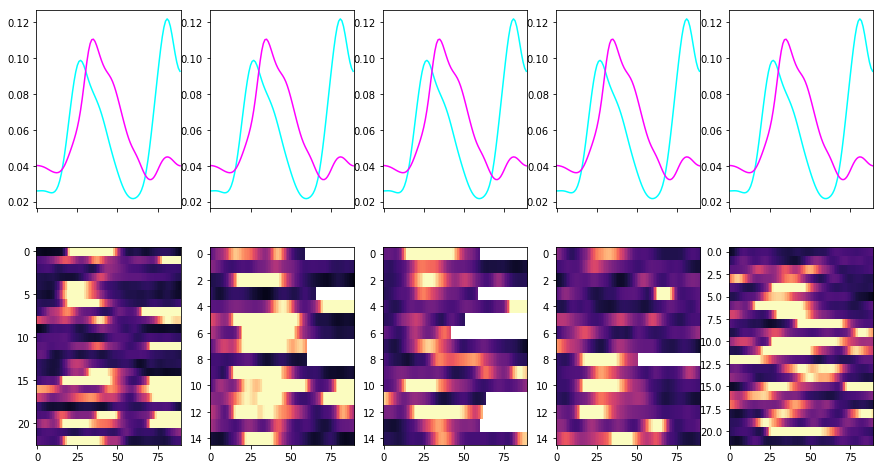

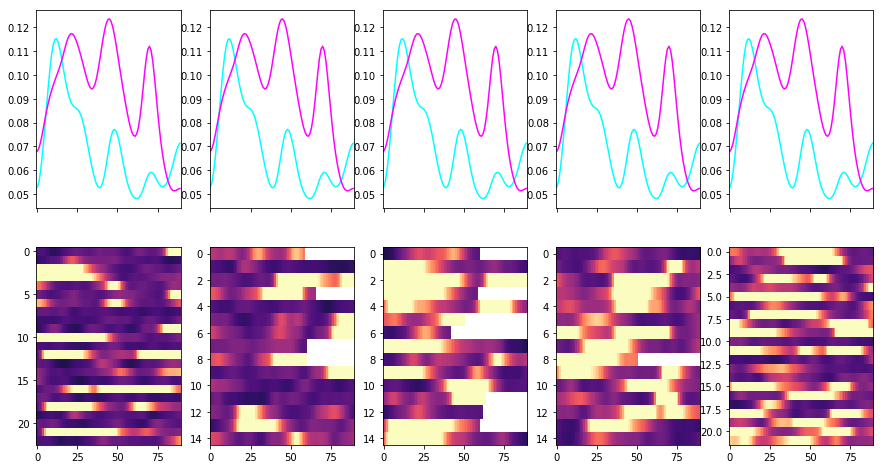

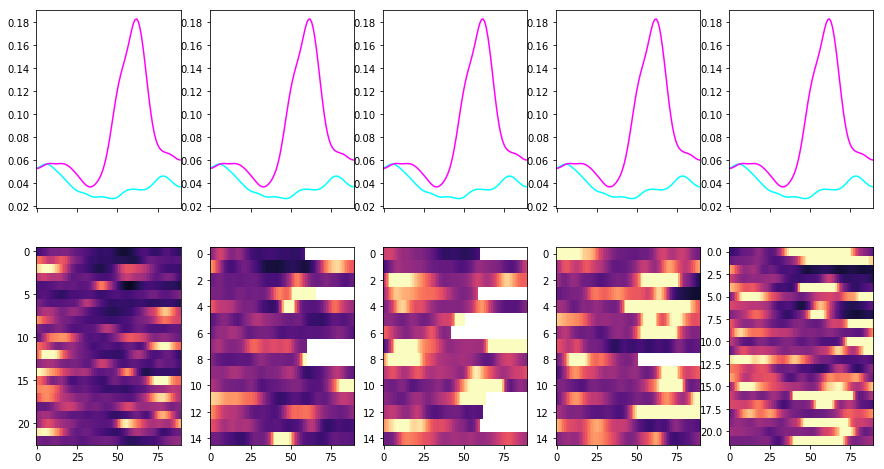

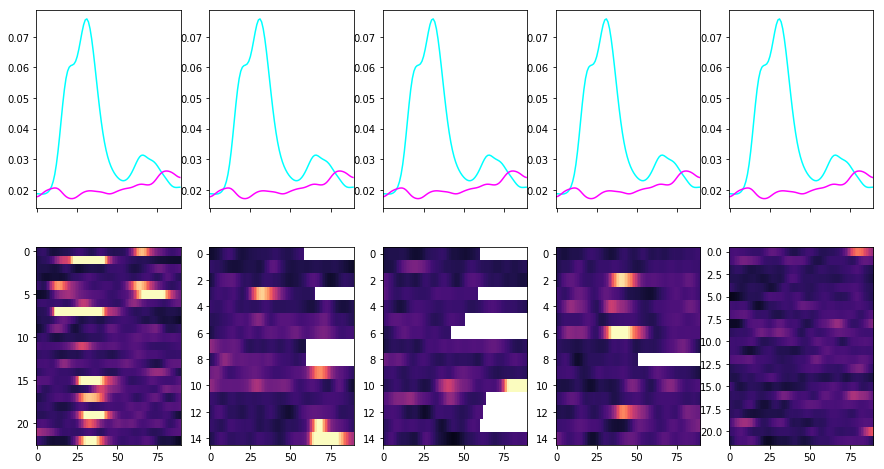

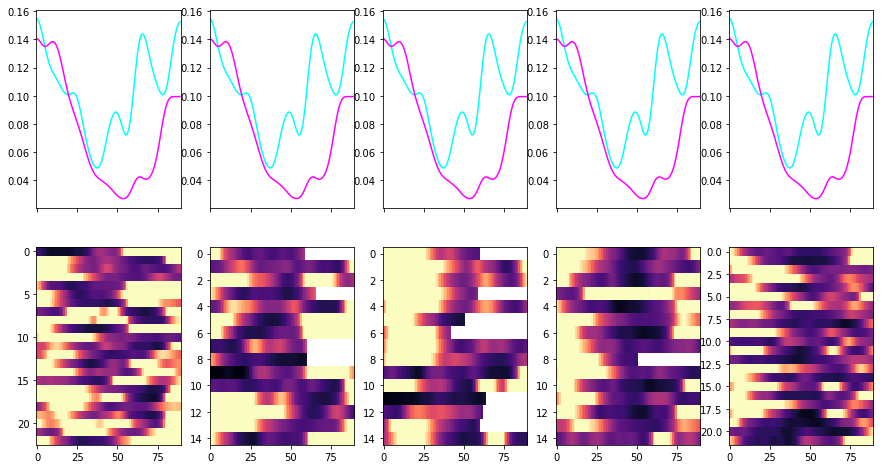

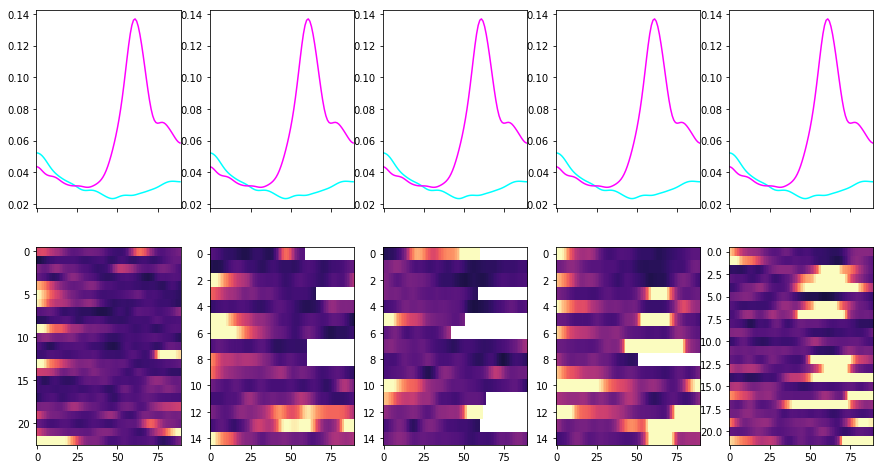

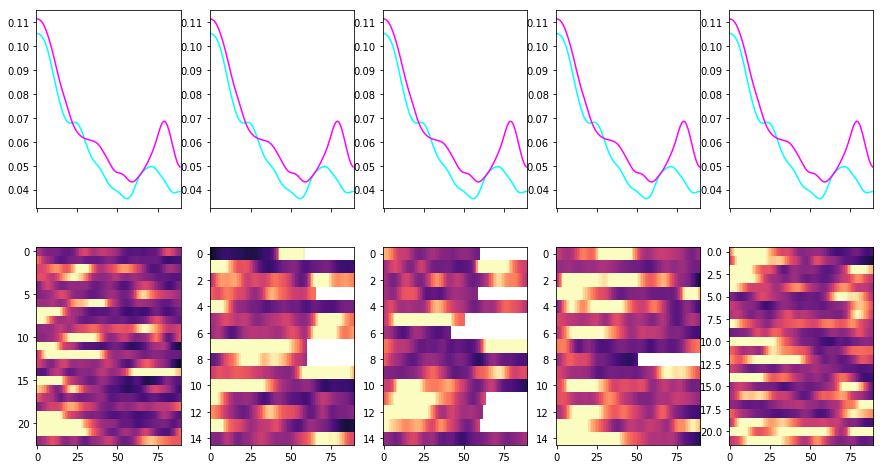

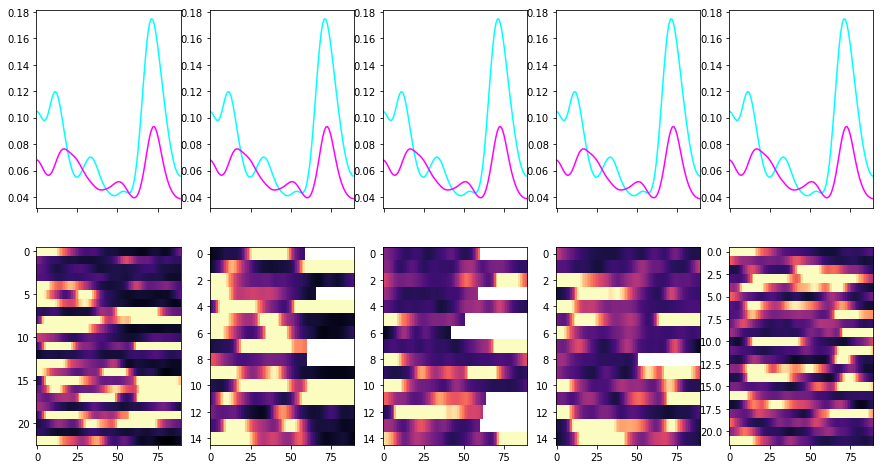

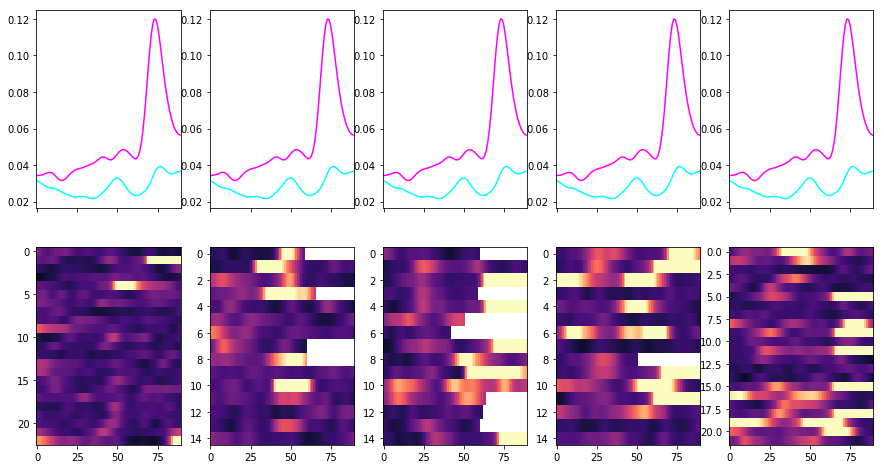

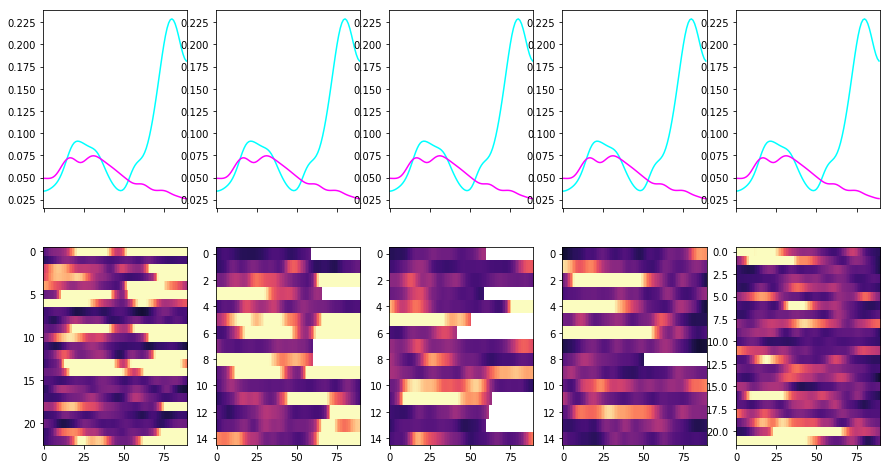

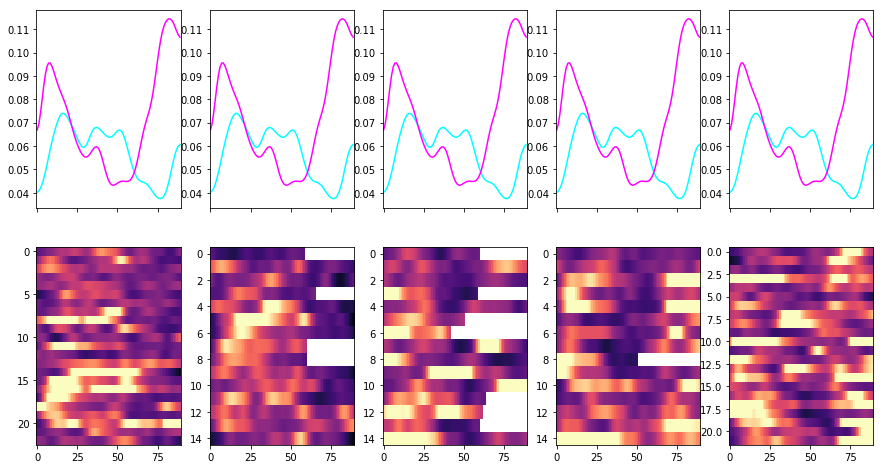

In [22]:
mu0 = bd.gaussian_filter1d(np.nanmean(C_trial_mat[trial_info['morphs']==0,:,:],axis=0),3,axis=0)
mu1 = bd.gaussian_filter1d(np.nanmean(C_trial_mat[trial_info['morphs']==1,:,:],axis=0),3,axis=0)
for c in range(0,S.shape[1],100):
    f,ax  = plt.subplots(2,5,figsize=[15,8],sharex=True)
    for i,m in enumerate([0,.25,.5,.75,1.]):
        ax[0,i].plot(mu0[:,c],color=plt.cm.cool(0.))
        ax[0,i].plot(mu1[:,c],color=plt.cm.cool(1.))
        im = bd.gaussian_filter1d(C_trial_mat[trial_info['morphs']==m,:,c],3,axis=1)
        ax[1,i].imshow(im,aspect='auto',cmap='magma',vmin=0,vmax=.1)
    

C:\Users\mplitt\Anaconda3\lib\site-packages\matplotlib\pyplot.py:522: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


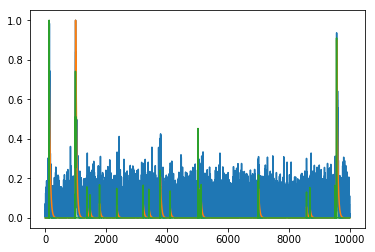

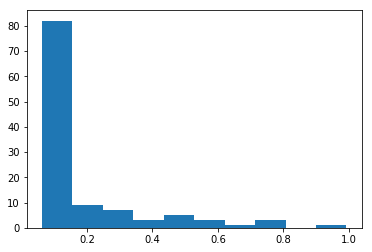

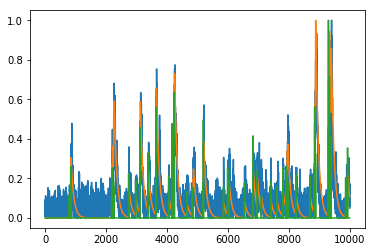

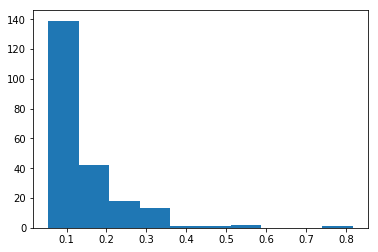

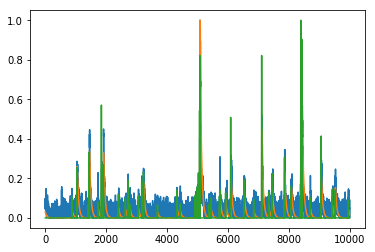

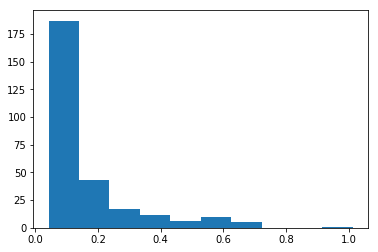

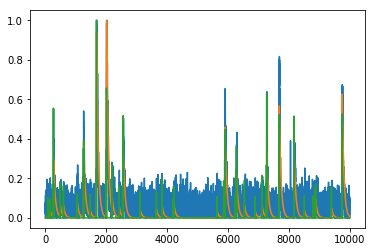

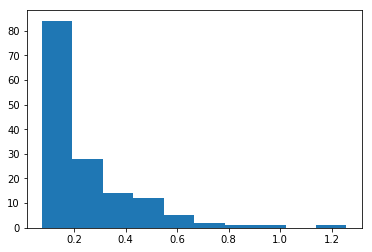

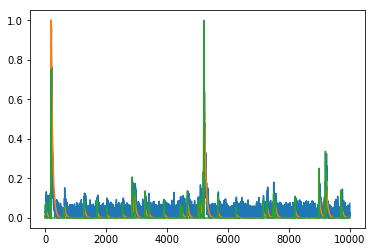

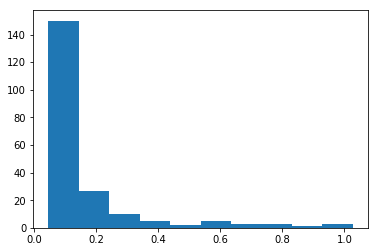

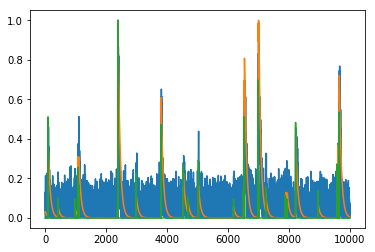

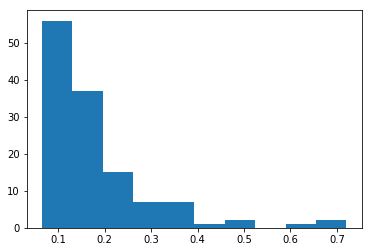

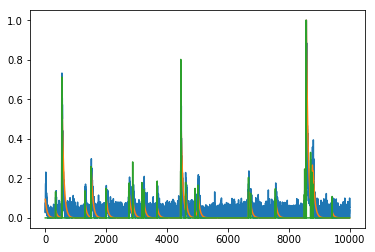

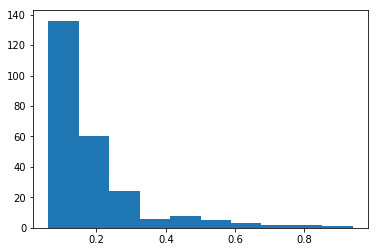

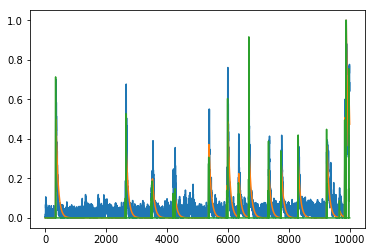

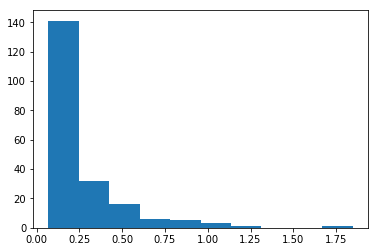

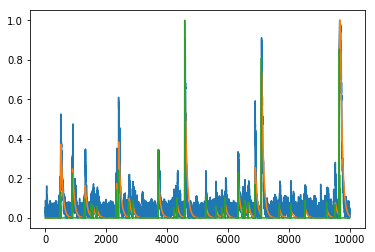

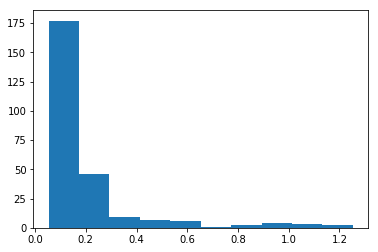

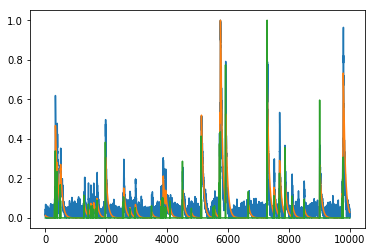

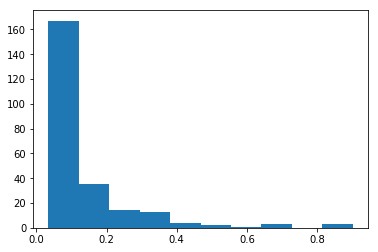

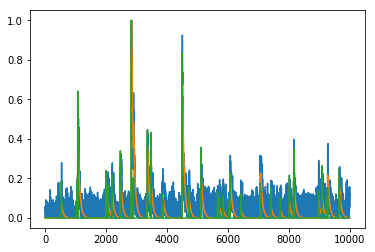

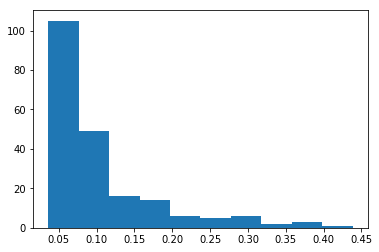

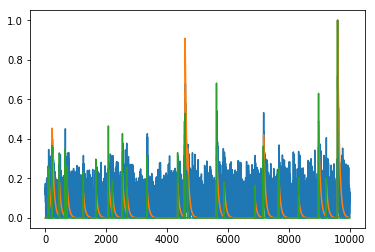

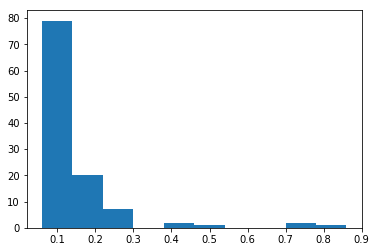

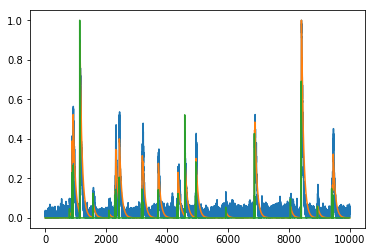

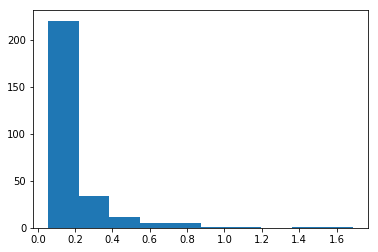

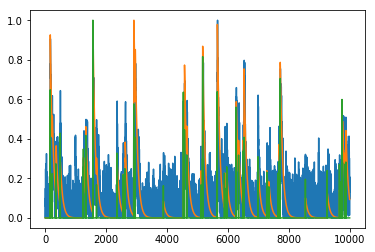

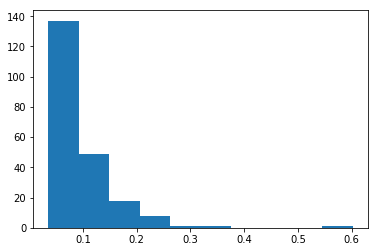

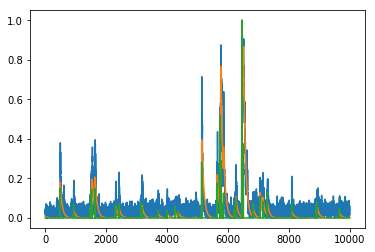

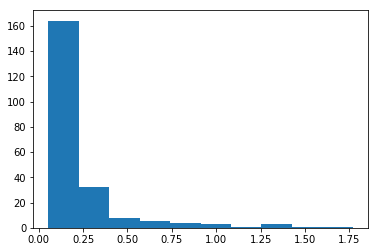

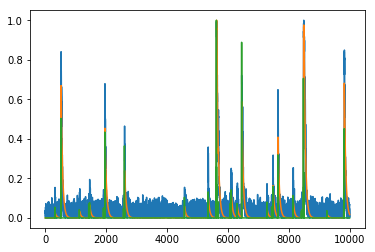

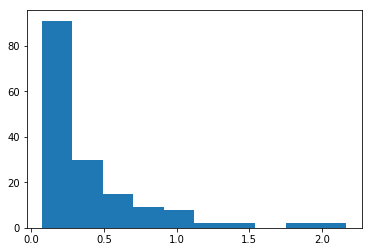

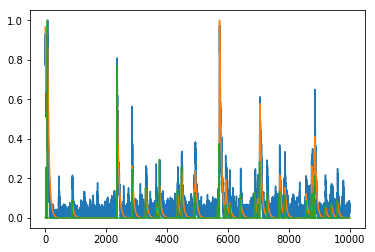

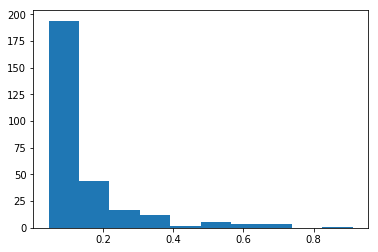

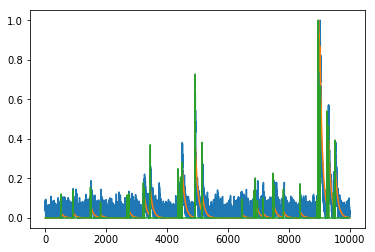

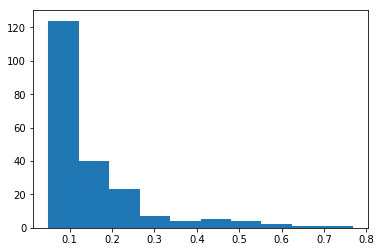

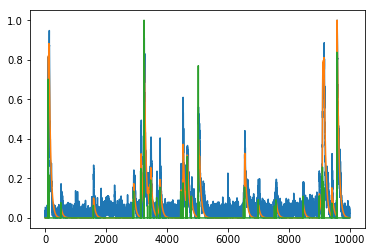

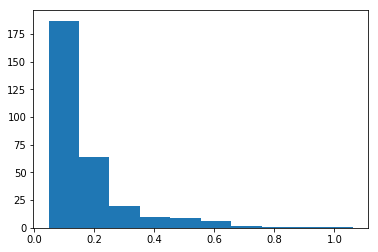

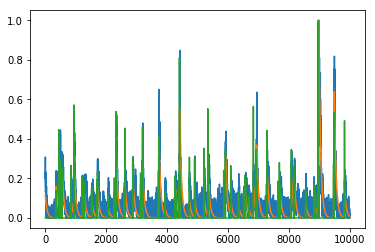

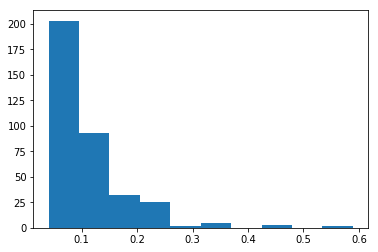

In [21]:
for c in range(0,C.shape[1],50):
    f,ax = plt.subplots()
    ax.plot(C[:10000,c]/np.max(C[:10000,c]))
    ax.plot(Cd[:10000,c]/np.max(Cd[:10000,c]))
    ax.plot(S[:10000,c]/np.max(S[:10000,c]))
    
    f,ax = plt.subplots()
    ax.hist(S[S[:,c]>0,c])

In [15]:
masks, FR, SI = pc.place_cells_calc(S, VRDat['pos']._values,trial_info, VRDat['tstart']._values, VRDat['teleport']._values,split_halves=False)

[0.00474321 0.00100853 0.00209364 ... 0.00238786 0.00235656 0.00245112]
[0.00323967 0.00204139 0.00339532 ... 0.00274534 0.00464033 0.00124002]


In [16]:
print(masks[0].sum(),masks[1].sum())

625 526


G:\My Drive\2P_Data\TwoTower\4139224.3\30_10_2018\TwoTower_Timeout\TwoTower_Timeout_001_002.mat


C:\Users\mplitt\MightyMorphingPhotonRangers\preprocessing.py:199: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  frame['ca inds'] = caInds
C:\Users\mplitt\Anaconda3\lib\site-packages\pandas\core\frame.py:3790: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


G:\My Drive\2P_Data\TwoTower\4139224.3\30_10_2018\TwoTower_Timeout\TwoTower_Timeout_001_002.mat
#subsystem#not made into numpy array
Anot made into numpy array
frame diff 0


C:\Users\mplitt\MightyMorphingPhotonRangers\utilities.py:203: RuntimeWarning: Mean of empty slice
  zone1_speed[i] = np.nanmean(sub_frame.loc[zone1_mask,'speed'])


[0.00474321 0.00100853 0.00209364 ... 0.00238786 0.00235656 0.00245112]
[0.00323967 0.00204139 0.00339532 ... 0.00274534 0.00464033 0.00124002]


C:\Users\mplitt\MightyMorphingPhotonRangers\PlaceCellAnalysis.py:287: RuntimeWarning: invalid value encountered in true_divide
  fr_n[:,j] = gaussian_filter1d(fr[:,j]/fr[:,j].max(),2)


morph 0 place cells = 628 out of 1027 , 0.611490 
morph 1 place cells = 543 out of 1027, 0.528724
common place cells = 323


C:\Users\mplitt\Anaconda3\lib\site-packages\scipy\stats\stats.py:3010: RuntimeWarning: invalid value encountered in double_scalars
  r = r_num / r_den
C:\Users\mplitt\Anaconda3\lib\site-packages\scipy\stats\stats.py:5256: RuntimeWarning: invalid value encountered in less
  x = np.where(x < 1.0, x, 1.0)  # if x > 1 then return 1.0


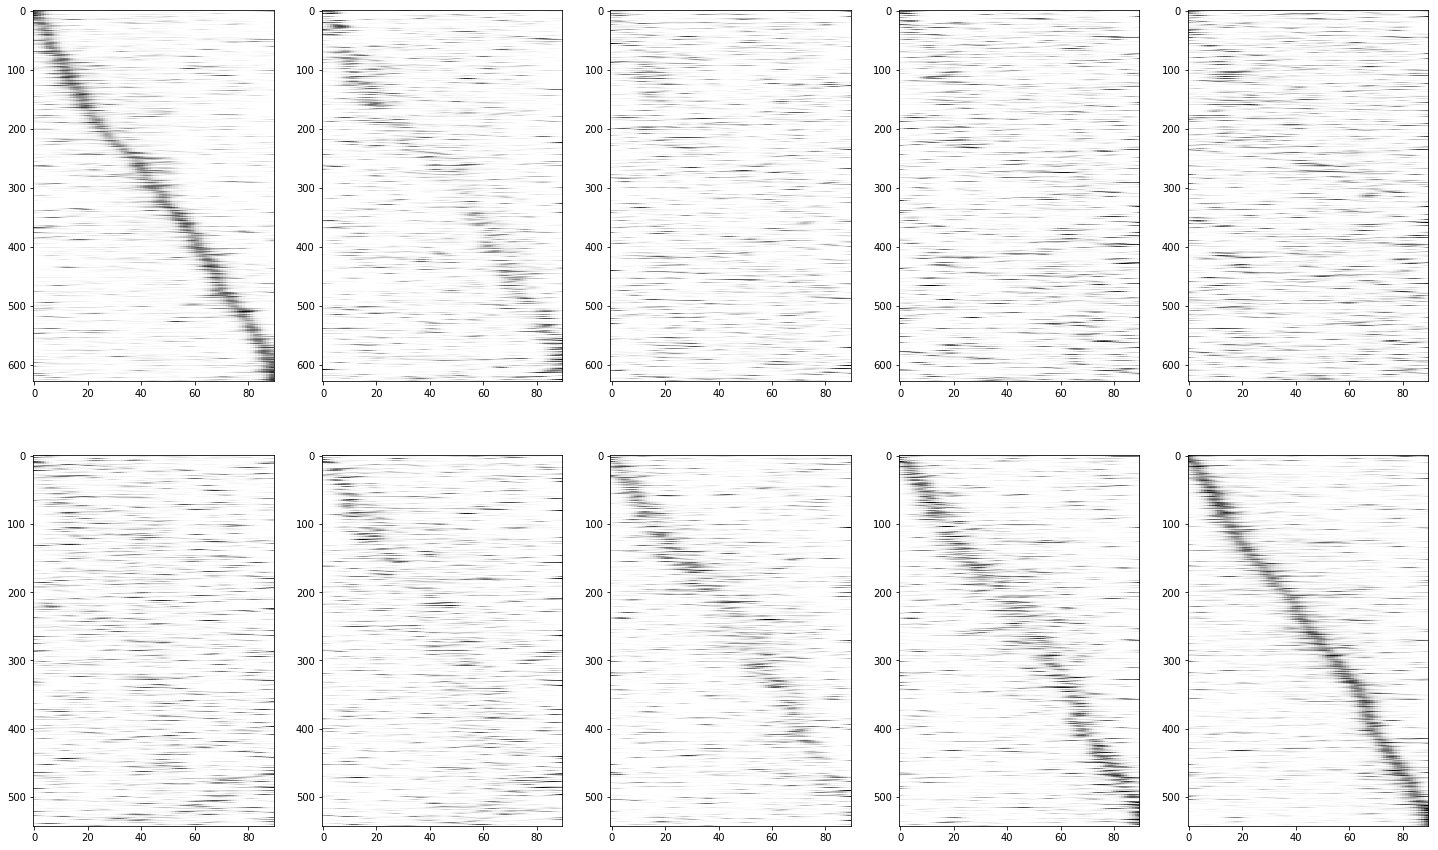

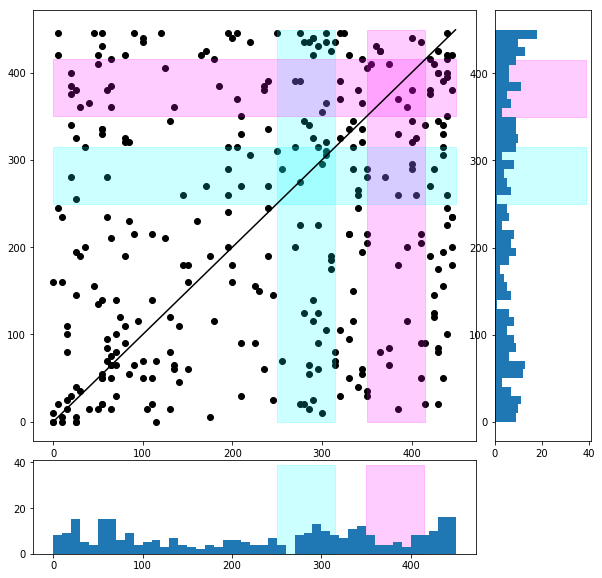

In [17]:
fr,masks,si = pc.single_session(sess,deconv=True)